#### This exercise aims to make you comfortable with the basic image processing tools and libraries. It will serve as a starting point before you dive deep into the course.

### Let's first import basic image processing or related libraries.

In [1]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.
import cv2


#### First load an image and visualize it.

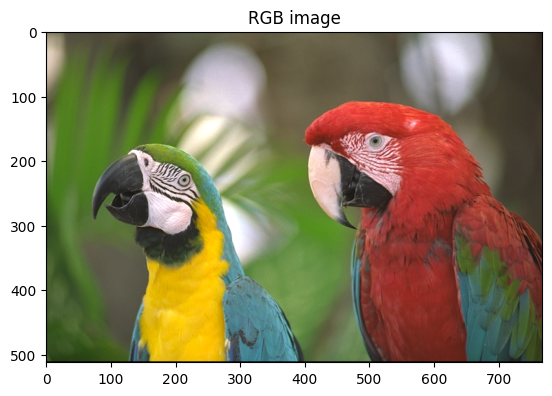

In [2]:
image = plt.imread("macau.png")
plt.imshow(image)
plt.title("RGB image")
plt.show()

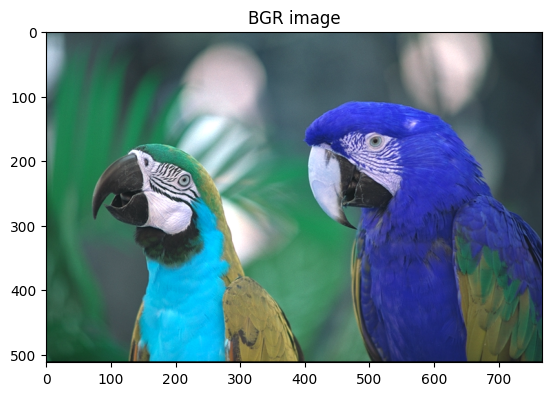

In [3]:
image = cv2.imread("macau.png")
plt.imshow(image)
plt.title("BGR image")
plt.show()

OpenCV imports images in B, G, R format so it takes R, G, B values as B, G, R so the parrot turns blue.

This can be corrected by using cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

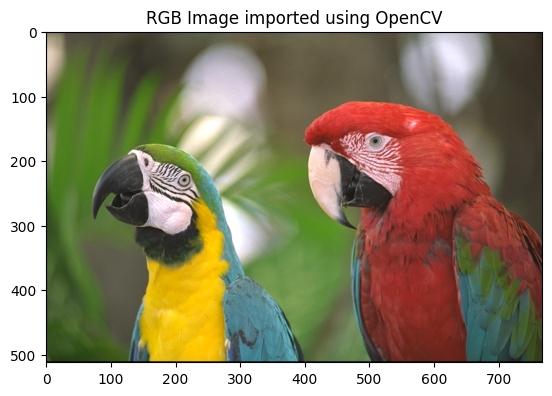

In [4]:
# to correct this, generally cv2.cvtColor(image, cv2.COLOR_BGR2RGB) is used
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("RGB Image imported using OpenCV")
plt.show()

# 1. Image Information

#### It is always good to know basic image details, such as its dimensions, before one proceeds for the experiments.

### Task1.1 : write code to find image dimension and print it

In [5]:
print("Image dimension:", image.shape)      # returns tuple(h, w, c)

Image dimension: (512, 768, 3)


In [6]:
print(f"Aspect ratio w / h: {image.shape[1] / image.shape[0]}")

Aspect ratio w / h: 1.5


### Task 1.2 : write code to find image intensity datatype

In [7]:
print("Image datatype:", image.dtype)

Image datatype: uint8


In [8]:
print(f"Red channel\nMax: {image[:,:,0].max()}\nMin: {image[:,:,0].min()}\nAvg: {image[:,:,0].mean()}")

Red channel
Max: 255
Min: 0
Avg: 121.66211954752605


#### Exercise:
#### Is this image RGB (no of channels?), gray or binary (intensity range?)? What can you say about aspect ratio (defined as width/height) of this image?

Ans.  
**RGB (3 channel)**  
**Real pixel values (between 0 to 255)**  
**Aspect ratio is 1.5**



#### Task1.3:  Visualization of each channel

An RGB image can be decomposed into three channels, Red(R), Green(G), Blue(B). In this subsection, let's visualize each channel separately.




In [9]:
def VisualizeChannel(image, channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here

    output = image[:, :, channel]

    return output    # 'output' is image's particular channel values

In [10]:
# Visualize red, green and blue channels

R = VisualizeChannel(image, 0)
G = VisualizeChannel(image, 1)
B = VisualizeChannel(image, 2)
# print("Red channel Values:", R)
# plt.title("Red Channel")
# plt.imshow(R, cmap = "Reds")
# plt.axis("off")
# plt.show()



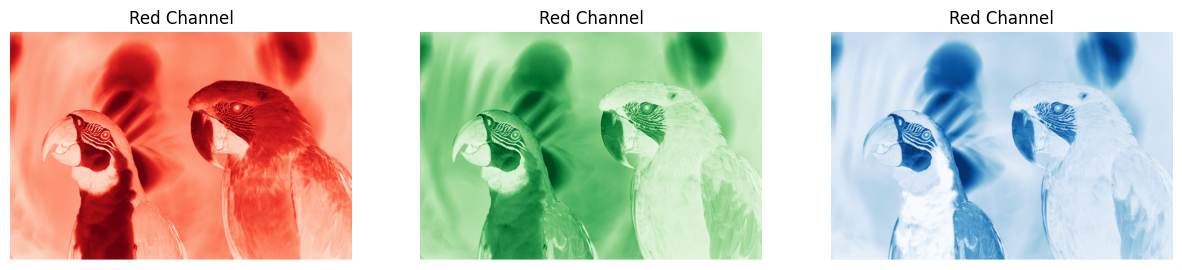

In [11]:
_, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(R, cmap="Reds")
axes[0].set_title("Red Channel")
axes[0].axis("off")

axes[1].imshow(G, cmap="Greens")
axes[1].set_title("Red Channel")
axes[1].axis("off")

axes[2].imshow(B, cmap="Blues")
axes[2].set_title("Red Channel")
axes[2].axis("off")

plt.show()

In [12]:
# print("Red channel:" , np.min(R), R.min())
print(f"Red channel\nMax: {R.max()}\nMin: {R.min()}\n")
print(f"Green channel\nMax: {G.max()}\nMin: {G.min()}\n")
print(f"Blue channel\nMax: {B.max()}\nMin: {B.min()}\n")

Red channel
Max: 255
Min: 0

Green channel
Max: 255
Min: 0

Blue channel
Max: 255
Min: 0



Can you also comment on the maximum and minimum intensity values of each channel? What can you say about the range of intensity values?

8-Bit images have intensity values from $[1, 2^8]$ i.e. $[1, 256]$

# 2. Intensity Manipulations

#### Preliminary Task: Normalization

Write a code to normalise the image in the range 0 to 1

In [13]:
def NormIm(image):
    '''
    This function normalises an image to 0 to 1 range
    image: Image
    '''
    # Write your code here (do note that sometimes the image may have already been normalised, so these cases need to be taken care of)
    if image.max() <= 1.0:
        nimage = image
    else:
        nimage = image / 255

    return np.clip(nimage, 0.0, 1.0) # to keep intensity values between [0.0, 1.0]

image = NormIm(image)

### Task 2.1: RGB to Gray  

*We* may need a gray image for some of our applications. One can also convert RGB to gray to reduce computational complexity. For this part, we will convert an RGB image to grayscale. Refer this link for explanation: https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm

In [14]:
def RGB2Gray(image, mode="weighted"):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result
    # For image classification, gray is enough as rgb takes require more memory
    # Two methods to convert it Average method , Weighted method or luminosity method

    #Average Method
    if mode == "avg":
        gray_image = np.mean(image, axis = 2)

    # Weighted method

    # (0.3 * R) + (0.59 * G) + (0.11 * B)
    # weights given as per the extent to which we can percieve that wavelength
    elif mode == "weighted":
        gray_image = np.sum(image * np.array([[[0.3, 0.59, 0.11]]]), axis = 2)
    else:
        print(f"Invalid mode: {mode}")
        return []

    return gray_image # 'gray' is grayscale image, converted from RGB image

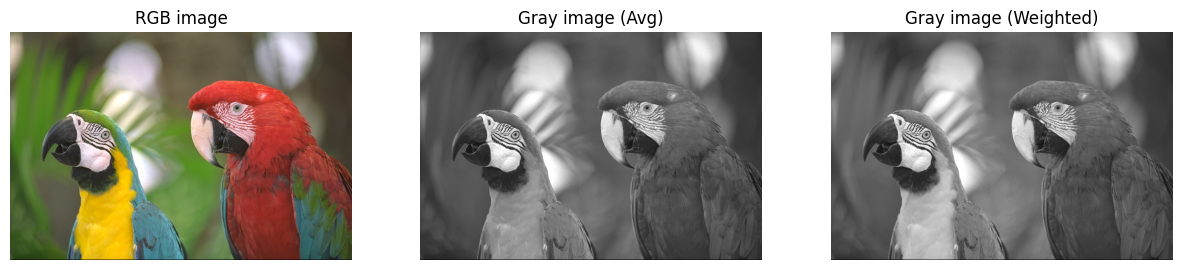

In [15]:
gray_image1 = RGB2Gray(image, mode="avg")
gray_image2 = RGB2Gray(image, mode="weighted")

_, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("RGB image")
axes[0].axis("off")

axes[1].imshow(gray_image1, cmap="gray")
axes[1].set_title("Gray image (Avg)")
axes[1].axis("off")

axes[2].imshow(gray_image2, cmap="gray")
axes[2].set_title("Gray image (Weighted)")
axes[2].axis("off")


# Display and compare the grayscale image using average method and  weighted method
plt.show()


We can also convert a gray image to a binary image. For task2.2, consider a gray image as input (you may take the output from task2.1 as input).

Write code to threshold a gray image such that

I(x,y) = 1 if I(x,y) >= T
       = 0   if I(x,y) < T   where T is threshold

Though there are proper methods( such as the Otsu method) to find a suitable T, we will not go into details of those algorithms and randomly select T values and visualize the result.

### Task 2.2 : Gray to Binary

Before you proceed to code, Can you comment on the valid range of T?  
For normalised images T ∈ [0.0, 1.0].  
For un-normalised images T ∈ [0.0, $2^{bit}$ - 1].  



In [16]:
def Gray2Binary(image, T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        gray = RGB2Gray(image)

    else:
        gray = image

    print(gray.shape)

    print(f"Min_gray = {gray.min()} Max_gray = {gray.max()} ")

    # Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimg = (gray >= T).astype(int)

    # Write code to visualize the resultant image
    plt.imshow(bimg, cmap = "gray")
    plt.axis('off')


    return bimg


(512, 768)
Min_gray = 0.0 Max_gray = 0.9999999999999999 
(512, 768)
Min_gray = 0.0 Max_gray = 0.9999999999999999 
(512, 768)
Min_gray = 0.0 Max_gray = 0.9999999999999999 
(512, 768)
Min_gray = 0.0 Max_gray = 0.9999999999999999 


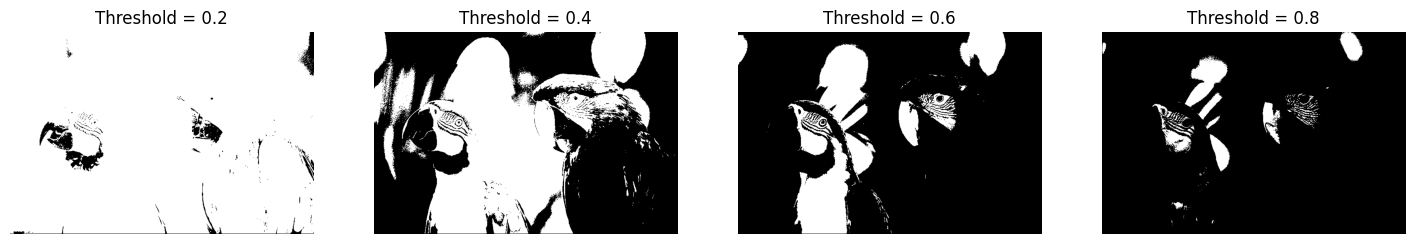

In [17]:
_, axes = plt.subplots(1, 4, figsize=(18,5))
axes = axes.flatten()
for i, threshold in enumerate([0.2, 0.4, 0.6, 0.8]):
    axes[i].imshow(Gray2Binary(image, threshold), cmap="gray")
    axes[i].set_title(f"Threshold = {threshold}")
    axes[i].axis("off")

An image is nothing but a matrix. Hence one can perform all kinds of mathematical operations on an image just like a matrix.



To convince ourselves with the above statement, let's crop a section of a gray image, print its value, and perform some mathematical operations. For a better data display, we will cut only 5*5 areas of the gray image.

### Task 2.3:  Crop a 5*5 section of a gray image

In [18]:
def ImageCrop(image, r0, c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray

    flag = image.shape[2]

    if flag == 3:
        gray = RGB2Gray(image)
    else:
        gray = image


    # write code to select 5*5 rectangular patch defined as above (say it 'patch')

    patch = gray[r0:r0+5, c0:c0+5]

    # visualize patch and print its value
    plt.imshow(patch, cmap = "gray")
    plt.axis('off')
    plt.title("Image patch")
    plt.show()
    print(patch)

    return patch

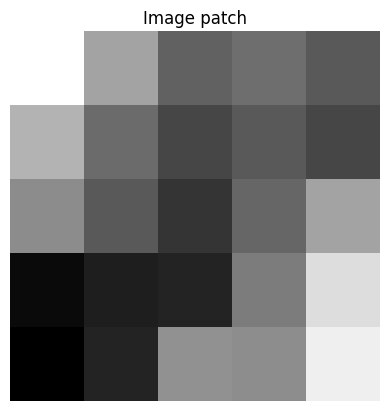

[[0.67643137 0.64984314 0.63019608 0.63411765 0.62784314]
 [0.65431373 0.6332549  0.62231373 0.62784314 0.62231373]
 [0.64282353 0.628      0.6174902  0.63176471 0.64976471]
 [0.60490196 0.61086275 0.61211765 0.63815686 0.66635294]
 [0.60184314 0.61215686 0.64435294 0.64294118 0.67156863]]


In [19]:
patch = ImageCrop(image, 180, 250)
# print(patch)

### Exercise:


Now you have 5*5 patch and you know its values too. Can you try


1. multiplying patch by 0.5
2. multiplying patch by 2
3. create another random 5*5 patch (numpy array) and add/subtract it to the patch

Does it follow matrix addition/subtraction and multiplication rules? You can also play around with other matrix operations.

In [20]:
def PathOperations(image, r0, c0):
    patch = ImageCrop(image, r0, c0)
    _, axes = plt.subplots(1, 5, figsize=(18,5))
    axes = axes.flatten()

    axes[0].imshow(patch * 0.5, cmap = "gray")
    axes[0].set_title("Patch * 0.5")
    axes[0].axis("off")

    axes[1].imshow(patch * 2, cmap = "gray")
    axes[1].set_title("Patch * 2")
    axes[1].axis("off")

    random = np.random.rand(5, 5)
    axes[2].imshow(random, cmap = "gray")
    axes[2].set_title("Random")
    axes[2].axis("off")

    axes[3].imshow(patch + random, cmap = "gray")
    axes[3].set_title("Patch + random")
    axes[3].axis("off")

    axes[4].imshow(patch * 0.5, cmap = "gray")
    axes[4].set_title("Patch - random")
    axes[4].axis("off")

    return {
        "patch * 0.5": patch * 0.5,
        "patch * 2": patch * 2,
        "random": random,
        "patch + random": patch + random,
        "patch - random": patch - random
    }


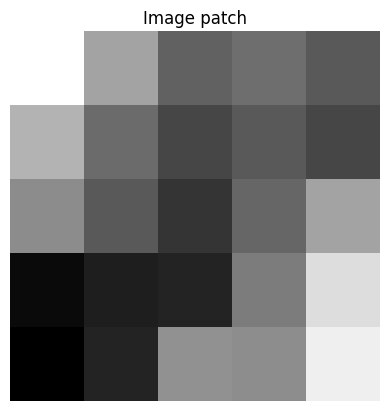

[[0.67643137 0.64984314 0.63019608 0.63411765 0.62784314]
 [0.65431373 0.6332549  0.62231373 0.62784314 0.62231373]
 [0.64282353 0.628      0.6174902  0.63176471 0.64976471]
 [0.60490196 0.61086275 0.61211765 0.63815686 0.66635294]
 [0.60184314 0.61215686 0.64435294 0.64294118 0.67156863]]


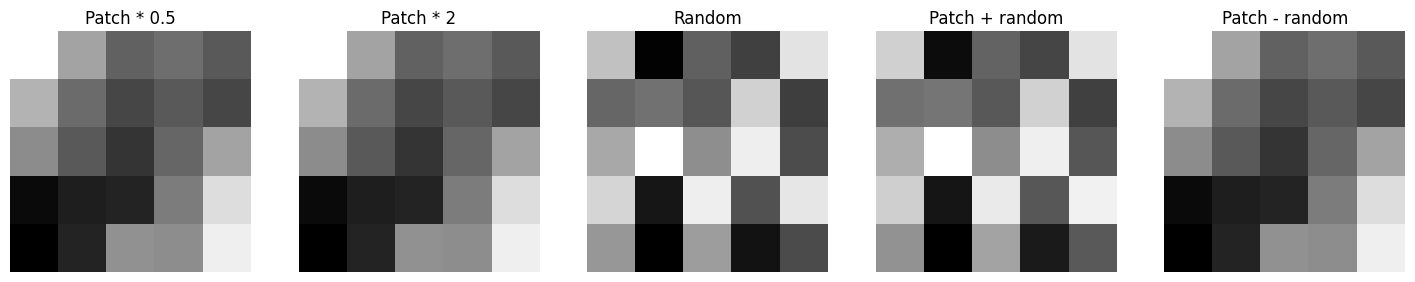

In [21]:
res = PathOperations(image, 180, 250)

In [22]:
print("patch:\n", patch)
print("\n-------------------\n")
for k, v in res.items():
    print(f"{k}:\n{v}\n-------------------\n")

patch:
 [[0.67643137 0.64984314 0.63019608 0.63411765 0.62784314]
 [0.65431373 0.6332549  0.62231373 0.62784314 0.62231373]
 [0.64282353 0.628      0.6174902  0.63176471 0.64976471]
 [0.60490196 0.61086275 0.61211765 0.63815686 0.66635294]
 [0.60184314 0.61215686 0.64435294 0.64294118 0.67156863]]

-------------------

patch * 0.5:
[[0.33821569 0.32492157 0.31509804 0.31705882 0.31392157]
 [0.32715686 0.31662745 0.31115686 0.31392157 0.31115686]
 [0.32141176 0.314      0.3087451  0.31588235 0.32488235]
 [0.30245098 0.30543137 0.30605882 0.31907843 0.33317647]
 [0.30092157 0.30607843 0.32217647 0.32147059 0.33578431]]
-------------------

patch * 2:
[[1.35286275 1.29968627 1.26039216 1.26823529 1.25568627]
 [1.30862745 1.2665098  1.24462745 1.25568627 1.24462745]
 [1.28564706 1.256      1.23498039 1.26352941 1.29952941]
 [1.20980392 1.22172549 1.22423529 1.27631373 1.33270588]
 [1.20368627 1.22431373 1.28870588 1.28588235 1.34313725]]
-------------------

random:
[[0.76820514 0.10857357

These operations follow matrix addition, subtraction and elementwise multiplication/ dot product.

### Task2.4: Uniform Brightness Scaling


##### Hopefully, you are convinced that an image is a matrix. Hence we can perform multiplication/division or addition/subtraction operations. These operations will change the brightness value of the image; can make an image brighter or darker depending on the multiplying/scaling factor. For this task, let's change the image brightness uniformly.
Consider scale to be 0.3,0.5,1,2 for four different cases. What is your observation?

Observation:
For scaling factor in between 0 to 1 image is dark. For scaling facor > 1, image is getting bright.

In [23]:
def UniformBrightScaling(image, scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'values need to be multiplied
    '''
    #write your code here

    # Apply scaling
    # we need to clip the intensity values between 0.0 to 1.0
    output = np.clip(image * scale, a_min=0.0, a_max=1.0)

    # Display the scaled image
    plt.imshow(output)
    plt.axis('off')
    plt.title(f"Scaled image (factor = {scale})")
    plt.show()
    plt.imsave(f"bright_{scale}_image.png", output)

    return output


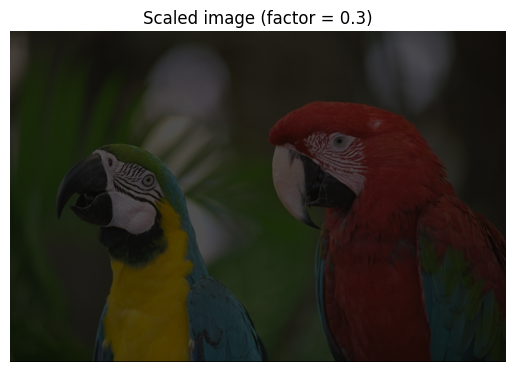

scaled: min=0.0, max=0.3


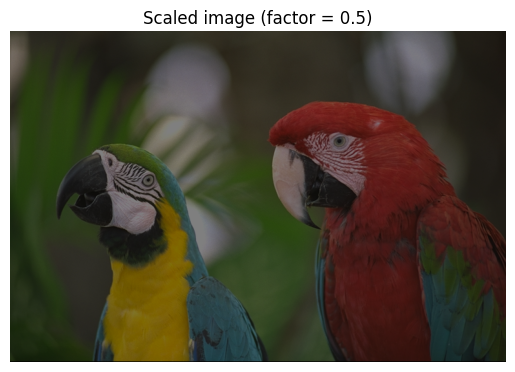

scaled: min=0.0, max=0.5


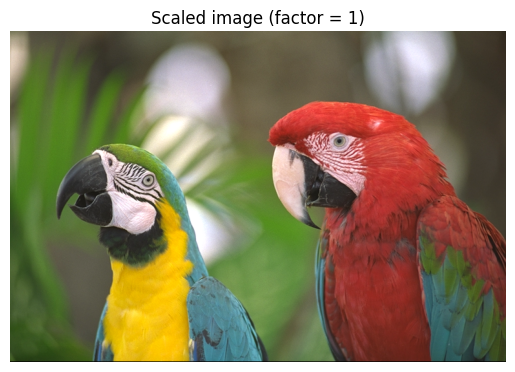

scaled: min=0.0, max=1.0


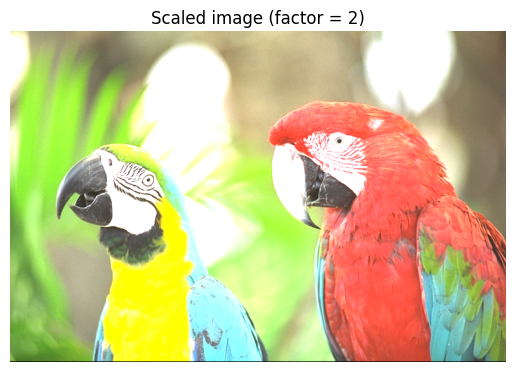

scaled: min=0.0, max=1.0


In [24]:
scaled1 = UniformBrightScaling(image, 0.3)
print(f"scaled: min={scaled1.min()}, max={scaled1.max()}")

scaled2 = UniformBrightScaling(image, 0.5)
print(f"scaled: min={scaled2.min()}, max={scaled2.max()}")

scaled3 = UniformBrightScaling(image, 1)
print(f"scaled: min={scaled3.min()}, max={scaled3.max()}")

scaled4 = UniformBrightScaling(image, 2)
print(f"scaled: min={scaled4.min()}, max={scaled4.max()}")

# 3. Image Filtering

In this section, you will perform some of the image filtering techniques.


Convolution is one of the most widely used operations for images. Convolution can be used as a feature extractor; different kernel results in various types of features.
Refer   https://en.wikipedia.org/wiki/Kernel_(image_processing) to see few examples of kernel.


In [25]:
def feature_extractor(image, kernel): # only for 3 x 3
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # first convert RGB to gray if input is RGB image

    l = len(image.shape)

    if l == 3:
        # write code to convert it to gray scale
        image = RGB2Gray(image)

    # write code to create a zero array of size (r,c) which will store the resultant value at specific pixel locations (say it output)

    r, c = image.shape

    # Create a zero array for the output image
    output = np.zeros((r, c))

    # Create a zero array with padding (size (r+2, c+2))
    pad_img = np.zeros((r+2, c+2))

    # Copy the gray image to the center of the padded image
    pad_img[1:r+1, 1:c+1] = image

    # Flip the kernel horizontally and vertically, as in convolution (kernel is flipped)
    kernel = np.flipud(np.fliplr(kernel))

    # Convolve the image with the kernel
    for row in range(1, r+1):
        for col in range(1, c+1):
            # Extract the 3x3 patch centered at (row, col)
            patch = pad_img[row-1:row+2, col-1:col+2]

            # Flatten the patch and the kernel, then take the dot product
            value = np.sum(np.dot(patch.flatten(), kernel.flatten()))

            # now copy gray image to above created array at location starting from (1,1)
            output[row-1, col-1] = value


    return output



In [26]:
#defining all kernels

# used to detect vertical edges
vertical_edge = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
# used to detect both horizontal and vertical edges
horizontal_edge  = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])
# used to detect both horizontal and vertical edges
laplacian_edge  = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])
filters = {
    "vertical edge detection" : vertical_edge,
    "horizontal edge detection" : horizontal_edge,
    "laplacian edge detection" : laplacian_edge,
    # "inner product of vertical & horizontal": np.array([[1,0,-1],[0,0,0],[-1,0,1]])
}


In [27]:
# h, w = 100, 150  # height, width
# img = np.zeros((h, w, 3), dtype=np.uint8)
# # draw main diagonal
# for i in range(min(h, w)):
#     img[i, i] = 1.0

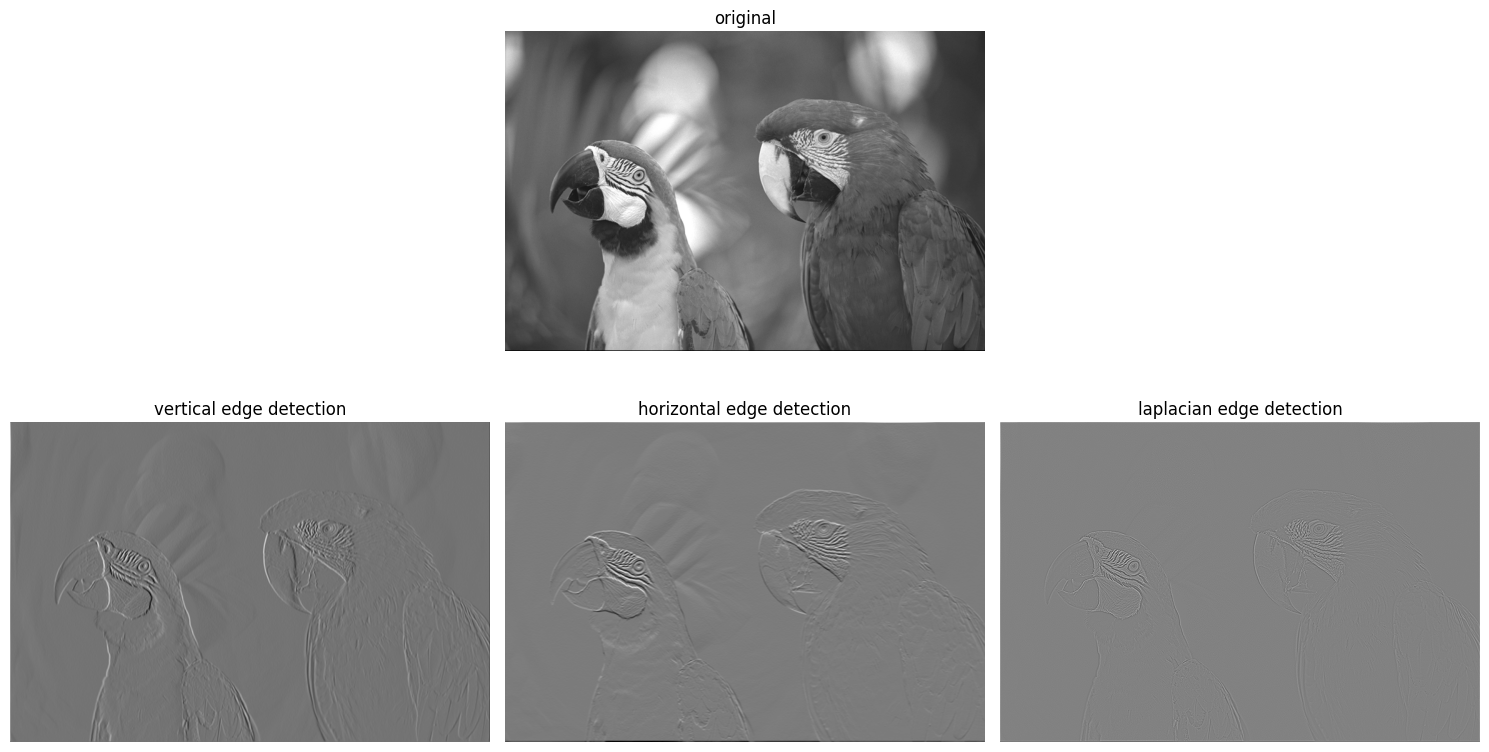

In [28]:
gray_image = RGB2Gray(image)
# edge_feature = feature_extractor(gray_image, edge)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes[0][1].imshow(gray_image, cmap = "gray")
axes[0][1].set_title("original")
axes[0][1].axis("off")

for i, (name, edge) in enumerate(filters.items()):
    edge_feature = feature_extractor(gray_image, edge)
    axes[1][i].imshow(edge_feature, cmap = "gray")
    axes[1][i].set_title(f"{name}")
    axes[1][i].axis("off")

fig.delaxes(axes[0][0])
fig.delaxes(axes[0][2])
plt.tight_layout()
plt.show()

### Task 3.1 Similarly check for vertical and horizontal edges

Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

for the above case, consider all 3 * 3 kernels from https://en.wikipedia.org/wiki/Kernel_(image_processing). What was your observation with different kernels? You can also play with other kernels, take any 3*3 matrix of your choice, convolve it with a gray image and see if it extracts some image features.

# 4.Geometric Transformation

In all of the above cases, you performed operations on the pixel value, i.e., photometric transformations. Now for this section, you will apply the transformations on pixel locations, i.e., spatial transformations
It is advised to go through below mentioned references(in order) before proceeding to this section:
1. https://www.youtube.com/watch?v=7liGDs9Vf-I&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=6
2. https://www.youtube.com/watch?v=FleSNIZp2kc&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=8
3. https://www.youtube.com/watch?v=NYkMk17J9O0&list=PLfZZTc8qI7He2d0VIE5CjkCkrNIPJuOdW&index=9
4. https://www.youtube.com/playlist?list=PLfZZTc8qI7Hc7n4Y2xZcfPbsd5K6eMhPE (L09-L13)

### Task 4.1: Image-Translation (In-plane)

Write a function to translate an image by a given direction and plot the original and the translated image

In [29]:
def translate_image(image, shift):
    '''
    Function outputs a translated image
    image: Image
    pixel: (dx, dy) tuple which contains how much the image should translate by in each direction
    '''
    h, w, nc = image.shape
    dx, dy = shift
    if dx == 0 and dy == 0:
        return image
    # Write code here
    img_padded = np.zeros((h + 2*abs(dx), w + 2*abs(dy), nc))
    img_padded[abs(dx): h + abs(dx), abs(dy): w + abs(dy), :] = image
    signh = np.sign(dx)
    signw = np.sign(dy)
    if dx > 0 and dy > 0:
        translated_image = img_padded[:h, :w, :]
    elif dx <= 0 and dy <= 0:
        translated_image = img_padded[-h:, -w:, :]
    elif dx > 0 and dy <= 0:
        translated_image = img_padded[:h, -w:, :]
    elif dx <= 0 and dy > 0:
        translated_image = img_padded[-h:, :w, :]

    return translated_image


X direction is along the height of image, Y direction is along the width of image.

(512, 768, 3)


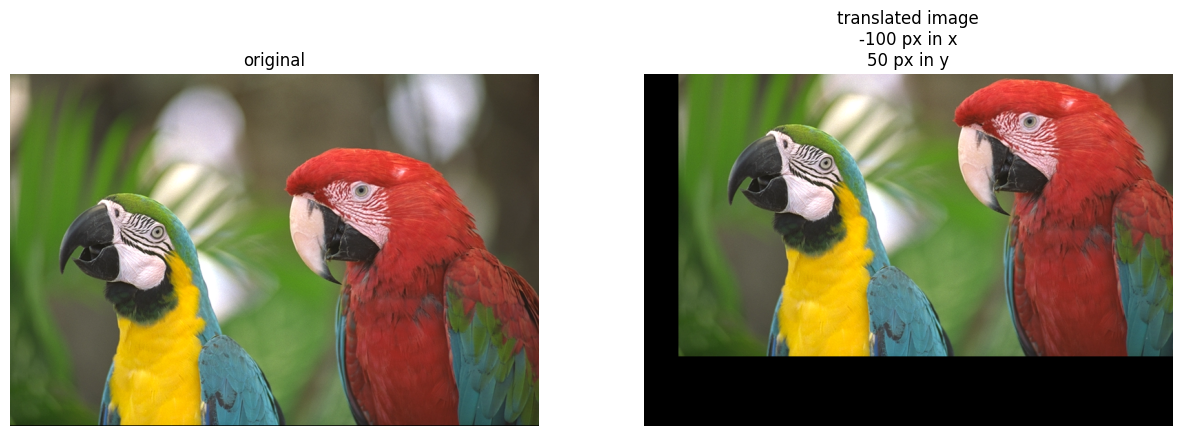

In [30]:
shift = (-100, 50)
translated_image = translate_image(image, shift)
print(translated_image.shape)
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].imshow(image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(translated_image, cmap = "gray")
axes[1].set_title(f"translated image\n{shift[0]} px in x\n{shift[1]} px in y")
axes[1].axis("off")

plt.show()

### Task4.2: Image Rotation (In-plane)

Write a function which rotates an image by 10 degrees in anticlockwise direction. (You can use inbuit functions for this, however it is encouraged to write code from scratch )


In [31]:
import math
def rotate_image(image, angle):
    h, w, nc = image.shape
    if angle == 0:
        return image
    # Convert angle to radians
    angle_rad = math.radians(angle)

    # Compute the rotation matrix
    rotation_matrix = np.array([
        [math.cos(angle_rad), -math.sin(angle_rad)],
        [math.sin(angle_rad), math.cos(angle_rad)]
    ])

    # Rotate wrt centre of image
    cx, cy = h // 2, w // 2

    rotated_image = np.zeros_like(image)

    # We do an inverse mapping from new pixel location to old pixel location
    # x_new = R @ x (x_new & x are centered, and then later shifted)

    ## below implementation is slow, we need to speed this up using numpy vectorization
    # for new_x in range(h):
    #     for new_y in range(w):
    #         p_new_centered = np.array([[new_x - cx], [new_y - cy]])
    #         # x_new_cent = R @ x_old_cent
    #         # x_old_cent = R_inv @ x_new_cent
    #         p_old_centered = np.linalg.inv(rotation_matrix) @ p_new_centered
    #         p_old = (p_old_centered + np.array([[cx], [cy]])).round().astype(int)
    #         old_x, old_y = p_old[0, 0], p_old[1, 0]
    #         if 0 <= old_x < h and 0 <= old_y < w: # bounds check
    #             rotated_image[new_x, new_y, :] = image[old_x, old_y, :]

    # Grid of output coordinates
    x_new, y_new = np.meshgrid(
        np.arange(h),
        np.arange(w),
        indexing="ij"
    )
    # shift to center
    x_new_c = x_new - cx
    y_new_c = y_new - cy

    # Inverse rotation
    x_old, y_old = (np.linalg.inv(rotation_matrix) @ np.array([x_new_c.flatten(), y_new_c.flatten()])).round().astype(int)

    # Shift back
    x_old += cx
    y_old += cy

    x_old, y_old = x_old.reshape(h, w), y_old.reshape(h, w) # return back to original indexing
    # Bounds check
    valid = (
        (x_old >= 0) & (x_old < h) &
        (y_old >= 0) & (y_old < w)
    )

    # Output
    rotated_image[valid] = image[x_old[valid], y_old[valid]]

    return rotated_image


(512, 768, 3)


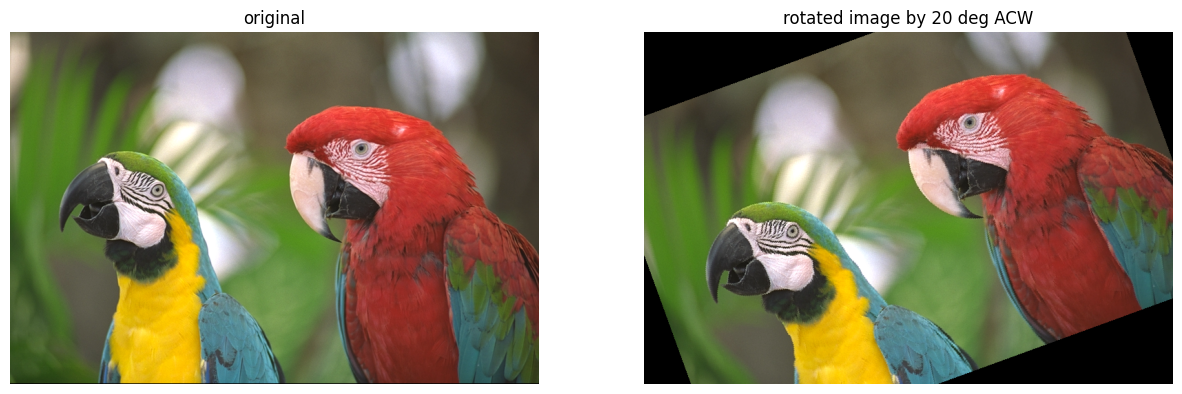

In [32]:
angle = 20
rotated_image = rotate_image(image, 20)

print(rotated_image.shape)
fig, axes = plt.subplots(1, 2, figsize=(15,5))

axes[0].imshow(image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(rotated_image, cmap = "gray")
axes[1].set_title(f"rotated image by {angle} deg ACW")
axes[1].axis("off")

plt.show()

#### Task 4.3 Translate and rotate


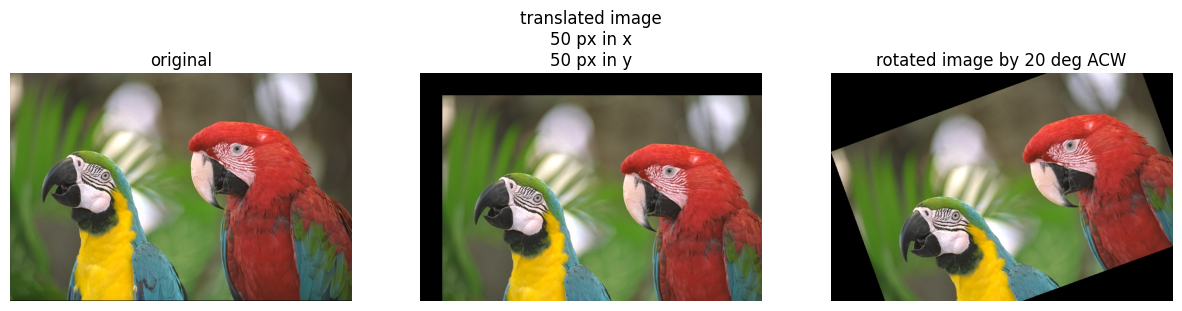

In [33]:
shift = (50, 50)
angle = 20
translated_image = translate_image(image, shift)
rotated_image = rotate_image(translated_image, angle)

fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].imshow(image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(translated_image, cmap = "gray")
axes[1].set_title(f"translated image\n{shift[0]} px in x\n{shift[1]} px in y")
axes[1].axis("off")

axes[2].imshow(rotated_image, cmap = "gray")
axes[2].set_title(f"rotated image by {angle} deg ACW")
axes[2].axis("off")

plt.show()

#### Task 4.4 Rotate then translate

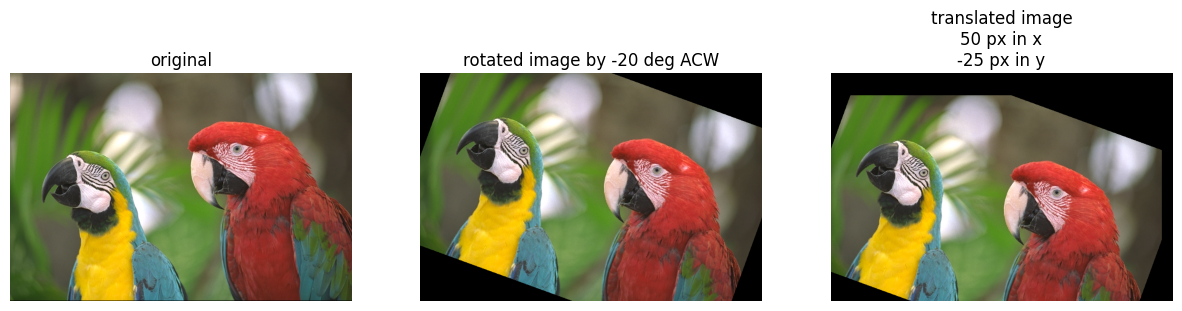

In [34]:
shift = (50, -25)
angle = -20
rotated_image = rotate_image(image, angle)
translated_image = translate_image(rotated_image, shift)

fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].imshow(image, cmap = "gray")
axes[0].set_title("original")
axes[0].axis("off")

axes[1].imshow(rotated_image, cmap = "gray")
axes[1].set_title(f"rotated image by {angle} deg ACW")
axes[1].axis("off")

axes[2].imshow(translated_image, cmap = "gray")
axes[2].set_title(f"translated image\n{shift[0]} px in x\n{shift[1]} px in y")
axes[2].axis("off")

plt.show()